In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

In [2]:
# import some data to play with
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
print(X)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

       0    1    2    3
0    5.1  3.5  1.4  0.2
1    4.9  3.0  1.4  0.2
2    4.7  3.2  1.3  0.2
3    4.6  3.1  1.5  0.2
4    5.0  3.6  1.4  0.2
5    5.4  3.9  1.7  0.4
6    4.6  3.4  1.4  0.3
7    5.0  3.4  1.5  0.2
8    4.4  2.9  1.4  0.2
9    4.9  3.1  1.5  0.1
10   5.4  3.7  1.5  0.2
11   4.8  3.4  1.6  0.2
12   4.8  3.0  1.4  0.1
13   4.3  3.0  1.1  0.1
14   5.8  4.0  1.2  0.2
15   5.7  4.4  1.5  0.4
16   5.4  3.9  1.3  0.4
17   5.1  3.5  1.4  0.3
18   5.7  3.8  1.7  0.3
19   5.1  3.8  1.5  0.3
20   5.4  3.4  1.7  0.2
21   5.1  3.7  1.5  0.4
22   4.6  3.6  1.0  0.2
23   5.1  3.3  1.7  0.5
24   4.8  3.4  1.9  0.2
25   5.0  3.0  1.6  0.2
26   5.0  3.4  1.6  0.4
27   5.2  3.5  1.5  0.2
28   5.2  3.4  1.4  0.2
29   4.7  3.2  1.6  0.2
..   ...  ...  ...  ...
120  6.9  3.2  5.7  2.3
121  5.6  2.8  4.9  2.0
122  7.7  2.8  6.7  2.0
123  6.3  2.7  4.9  1.8
124  6.7  3.3  5.7  2.1
125  7.2  3.2  6.0  1.8
126  6.2  2.8  4.8  1.8
127  6.1  3.0  4.9  1.8
128  6.4  2.8  5.6  2.1
129  7.2  3.0  5

In [3]:
# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to
# # Visualise the clustering results plt.figure(figsize=(14,14))
print(model.labels_)
colormap = np.array(['red', 'lime', 'black'])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


Text(0,0.5,'Petal Width')

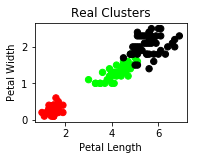

In [4]:
# Plot the Original Classifications using Petal features
plt.subplot(2, 2, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Real Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Text(0,0.5,'Petal Width')

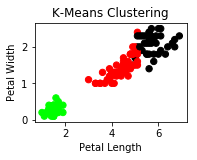

In [5]:
# Plot the Models Classifications
plt.subplot(2, 2, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40)
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')

Observation: The GMM using EM algorithm based clustering matched the true labels moreclosely than the Kmeans.


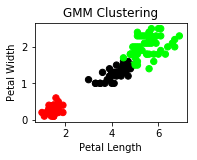

In [6]:
# General EM for GMM
from sklearn import preprocessing
# transform your data such that its distribution will have a
# mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler()
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3)
gmm.fit(xs)
gmm_y = gmm.predict(xs)
plt.subplot(2, 2, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[gmm_y], s=40)
plt.title('GMM Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
print('Observation: The GMM using EM algorithm based clustering matched the true labels moreclosely than the Kmeans.')